In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart-disease.names
/kaggle/input/heart-disease/switzerland.data
/kaggle/input/heart-disease/WARNING
/kaggle/input/heart-disease/long-beach-va.data
/kaggle/input/heart-disease/processed.va.data
/kaggle/input/heart-disease/processed.switzerland.data
/kaggle/input/heart-disease/cleve.mod
/kaggle/input/heart-disease/new.data
/kaggle/input/heart-disease/Index
/kaggle/input/heart-disease/bak
/kaggle/input/heart-disease/cleveland.data
/kaggle/input/heart-disease/ask-detrano
/kaggle/input/heart-disease/processed.cleveland.data
/kaggle/input/heart-disease/processed.hungarian.data
/kaggle/input/heart-disease/hungarian.data
/kaggle/input/heart-disease/reprocessed.hungarian.data
/kaggle/input/heart-disease/costs/heart-disease.expense
/kaggle/input/heart-disease/costs/heart-disease.delay
/kaggle/input/heart-disease/costs/heart-disease.README
/kaggle/input/heart-disease/costs/Index
/kaggle/input/heart-disease/costs/heart-disease.group
/kaggle/input/heart-disease/costs/he

In [2]:
import pandas as pd # to load ,manupilate data and for One Hot encoding
import numpy as np # std , mean (calculation)
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease/processed.cleveland.data',header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Naming columns

[Only 14 attributes used:](http://)https://archive.ics.uci.edu/dataset/45/heart+disease
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

In [5]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldeak','slope','ca','thal','hd']

In [6]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df.shape

(303, 14)

In [8]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldeak     float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

**ca** and **thal** are object data types which is somethig questionable as per the documentation (http://)https://archive.ics.uci.edu/dataset/45/heart+disease both are **categorical data** 

# 1. Identifying Missing Data

In [9]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldeak     0
slope      0
ca         0
thal       0
hd         0
dtype: int64

here missing data is not mentioned as **na**

In [10]:
df.ca.unique() #Another way of writing df['ca'].unique() 

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

1. **?** is missing data
1. unique values are not sorted,use the sort_values() function after calling unique()

In [11]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# 2. Imputing Missing Data

In [12]:
len(df.loc[(df.ca == '?') | (df.thal == '?')]) # total ?

6

In [13]:
df.loc[(df.ca == '?') | (df.thal == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


So 6 out 303 rows 0r 2% contains missing data. So we can drop

In [14]:
df_no_missing = df.loc[~((df.ca == '?') | (df.thal == '?'))] #negatiing missing values

In [15]:
len(df_no_missing)

297

In [16]:
df_no_missing.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [17]:
df_no_missing.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# Splitting data into Independent and dependent Variables

In [18]:
X= df_no_missing.drop('hd', axis=1).copy() # df_no_missing.iloc[::-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [19]:
y = df_no_missing.hd.copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# One Hot Encoding

age:float
Sex:Category
cp(chest pain) :category
restbp : Float
chol :Float
fbs : Category
thalach :Float
exang: Caterory
oldspeak : Float
slope : Category
ca : Float
thal : category


In [20]:
X.cp.unique()

array([1., 4., 3., 2.])

In [21]:
df_no_missing.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldeak', 'slope', 'ca', 'thal', 'hd'],
      dtype='object')

In [22]:
pd.set_option("display.max_columns", 200)

In [23]:
X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


**3 other categoriacl  columns sex , fb and exang only contains o's and 1's so othing much to do**

In [24]:
y.unique()

array([0, 2, 1, 3, 4])

**Converting values greater than 0 to one for simplification purpose**

In [25]:
index=y>0#y.loc[y>0]=1
y[index]=1
# print(index)

In [26]:
y.unique()

array([0, 1])

In [27]:
y.head(17)

0     0
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    1
Name: hd, dtype: int64

In [28]:
merged_df = pd.concat([X_encoded, y], axis=1)

In [29]:
merged_df

,age,sex,restbp,chol,fbs,thalach,exang,oldeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,hd
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


In [30]:
X= merged_df.drop('hd', axis=1).copy() # df_no_missing.iloc[::-1]
X.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,0,1,1,0,0,1,0,0


In [31]:
y = merged_df.hd.copy()
y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

In [32]:
X_encoded.shape

(297, 22)

In [33]:
y.shape

(297,)

In [34]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(X_encoded,y ,random_state=42,)
#Creating decision tree
clf_dt = DecisionTreeClassifier(random_state=42)


In [35]:
len(x_train)

222

In [36]:
len(y_train)

222

In [37]:
clf_dt = clf_dt.fit(x_train , y_train)

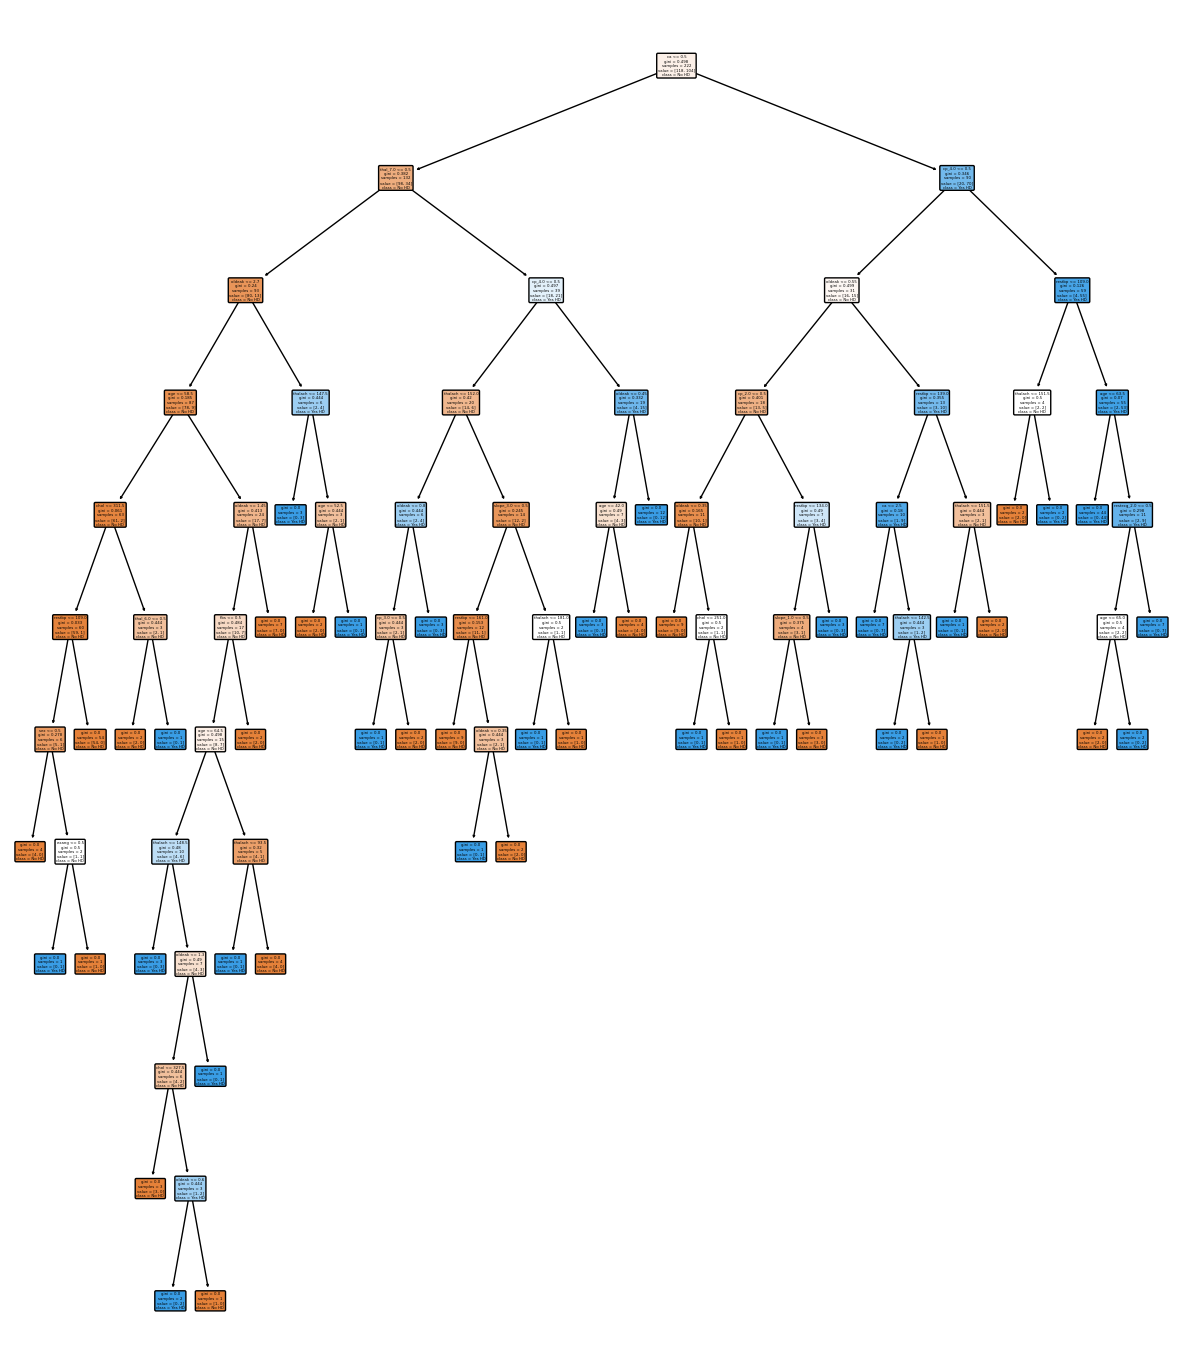

In [38]:
plt.figure(figsize=(15,17.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X_encoded.columns)
plt.show()

# Confusion Matrix

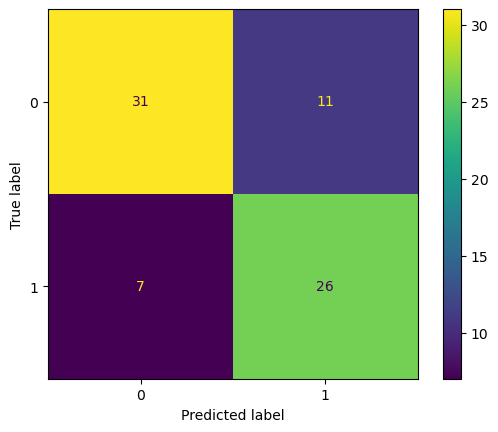

In [39]:
predictions = clf_dt.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)


disp=ConfusionMatrixDisplay(cm,display_labels=clf_dt.classes_)
disp.plot()

# Cost complexity pruning

In [40]:
path=clf_dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

In [41]:
clf_dts=[]

In [42]:
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)

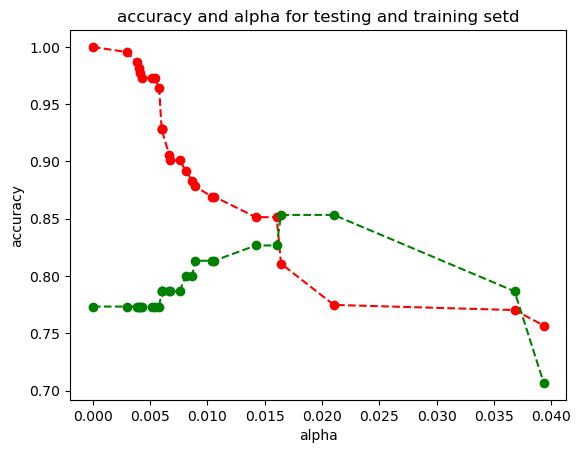

In [43]:
train_score=[clf_dt.score(x_train,y_train)for clf_dt in clf_dts]
test_score=[clf_dt.score(x_test,y_test)for clf_dt in clf_dts]
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy and alpha for testing and training setd")
ax.plot(ccp_alphas , train_score ,"ro--")
ax.plot(ccp_alphas , test_score ,"go--")

**Cross Validataion for finding the best Alpha**

In [44]:
clf_dt = DecisionTreeClassifier(random_state =42 , ccp_alpha=0.016)
scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})


<Axes: xlabel='tree'>

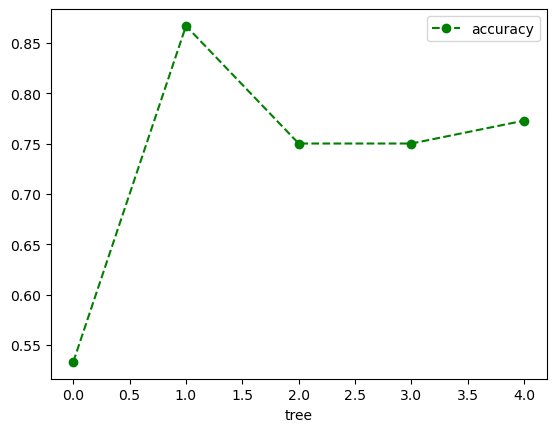

In [45]:
df.plot(x='tree', y='accuracy', style="go--")


In [46]:
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0 ,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,x_train,y_train , cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    

In [47]:
alpha_results = pd.DataFrame(alpha_loop_values, columns =['alpha','mean_accuracy',"std"])

<Axes: xlabel='alpha'>

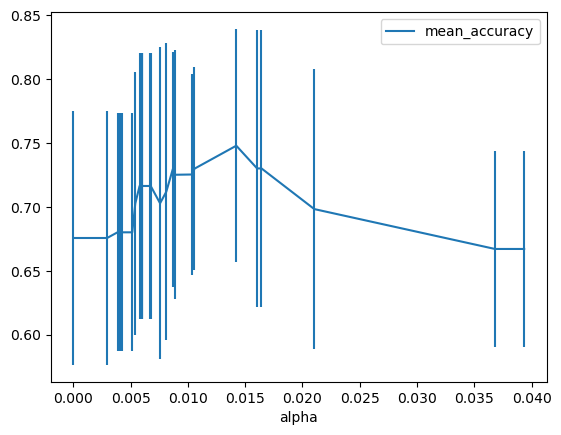

In [48]:
alpha_results.plot(x='alpha' , y='mean_accuracy', yerr='std', style='bo--')

In [49]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [50]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']

In [51]:
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [52]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

# Evaluation

In [53]:
#using optimal value of alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(x_train , y_train)

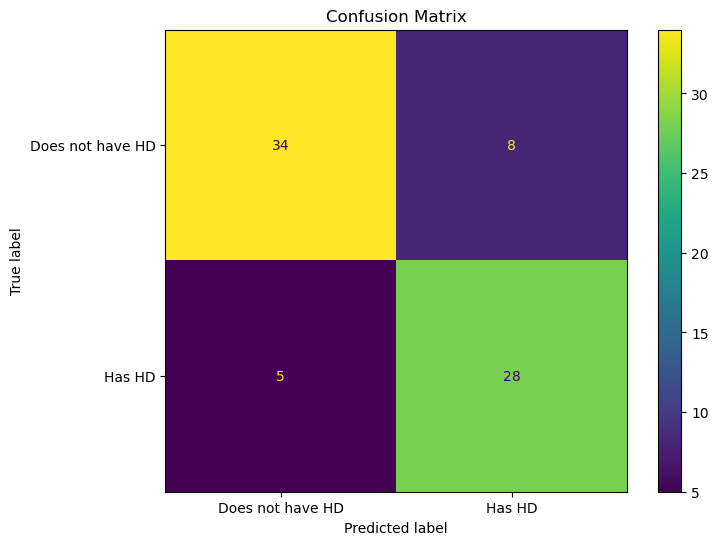

In [54]:
cm = confusion_matrix(y_test, clf_dt_pruned.predict(x_test))

# Define the display labels
display_labels = ["Does not have HD", "Has HD"]

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)

# Add a title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Show the plot
plt.show()

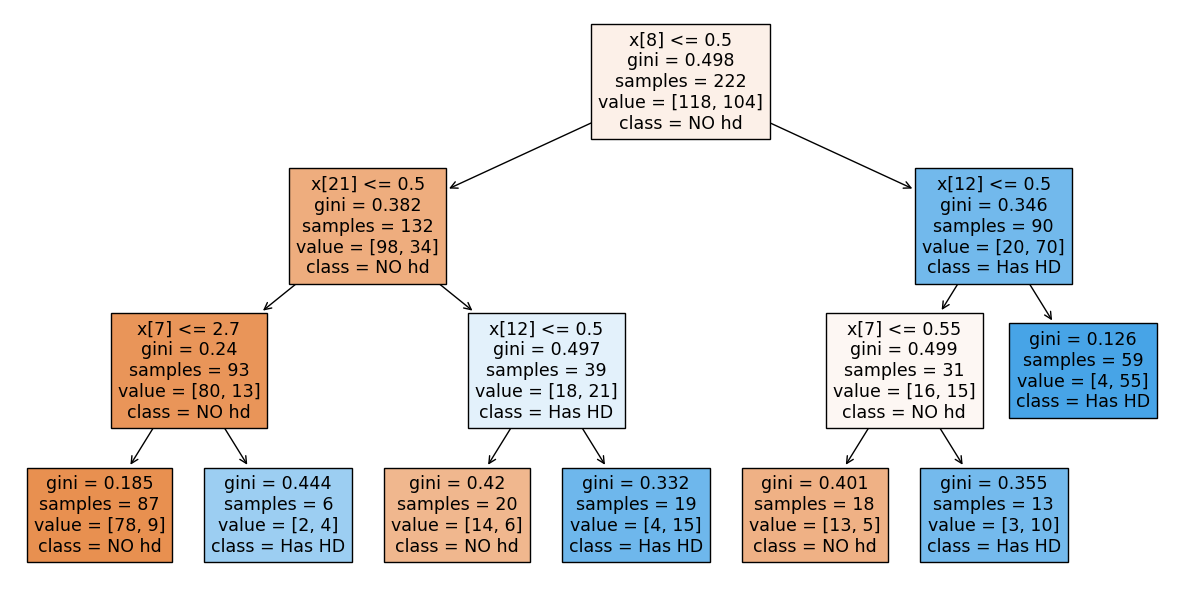

In [55]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,class_names=["NO hd" ,"Has HD"])
plt.show()